# Лабораторна робота №1 з курсу "Машинне навчання"

## Болдир Максим ТВ-91

**Варіант**: 1

**Модель**: Decision Tree/Random Forest

**Dataset**: Breast cancer Wisconsin (diagnostic) dataset

### Імпорт бібліотек

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Огляд датасету

In [15]:
dataset = load_breast_cancer(as_frame=True)

df = dataset.frame.rename(columns={"target": "diagnosis"}, errors="raise")

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Датасет складається зі значень, обчислених на основі оцифрованого зображення тонкоголкової аспіраційної пункційної біопсії пухлини молочної залози. Вони описують характеристики клітинних ядер, присутніх на зображенні.

Визначено mean (середньоарифметичне), error (середньоквадратичне відхилення середнього) та worst (середньоарифметичне трьох найбільших значень) для кожної з наступних характеристик:

- target(diagnosis) - діагноз щодо пухлини. 0 - benign(доброякісна), 1 - malignant(злоякісна).
- radius - середнє значення відстаней від центру до точок периметра.
- texture - стандартне відхилення значень градації сірого.
- perimeter - периметр.
- area - площа.
- smoothness - локальна варіація довжини радіуса.
- compactness - $ \dfrac{perimeter ^ 2}{area - 1.0} $.
- concavity - вираженість увігнутих ділянок контуру.
- concave points - кількість увігнутих ділянок контуру.
- symmetry - симетрія.
- fractal dimension - фрактальна розмірність.

### Теплова карта кореляційної матриці

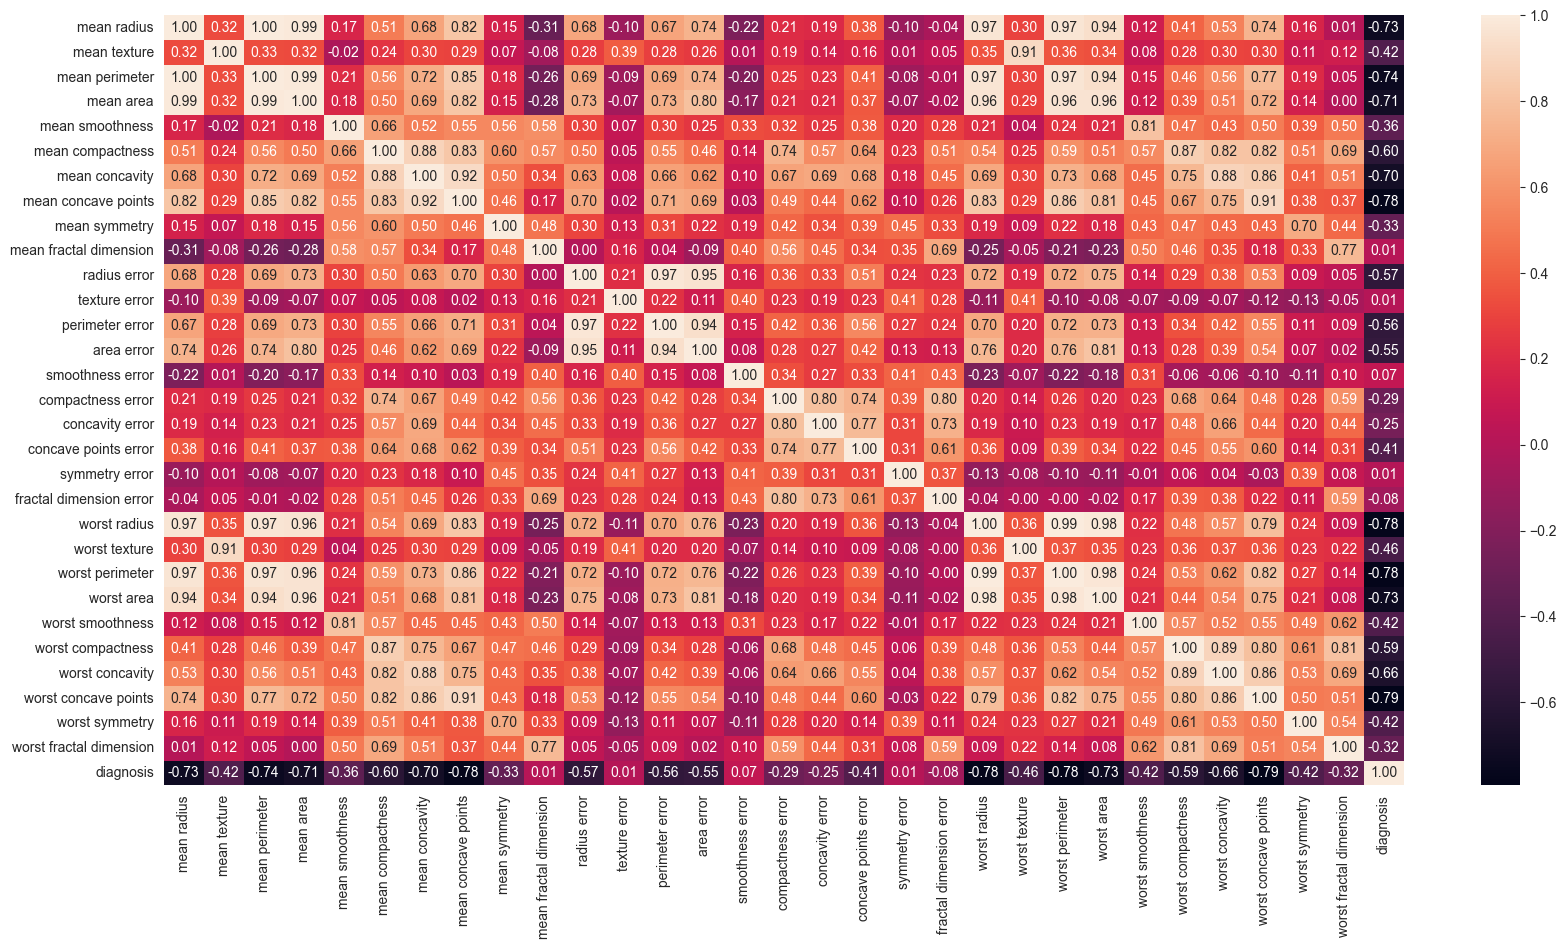

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(20,10))
data_plt = sns.heatmap(corr_matrix, annot=True, fmt='.2f')

### Decision Tree

Тренування моделі методом Decision Tree.

In [17]:
x_train, x_test , y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.5, random_state=0)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)


Візуалізація дерева рішень.

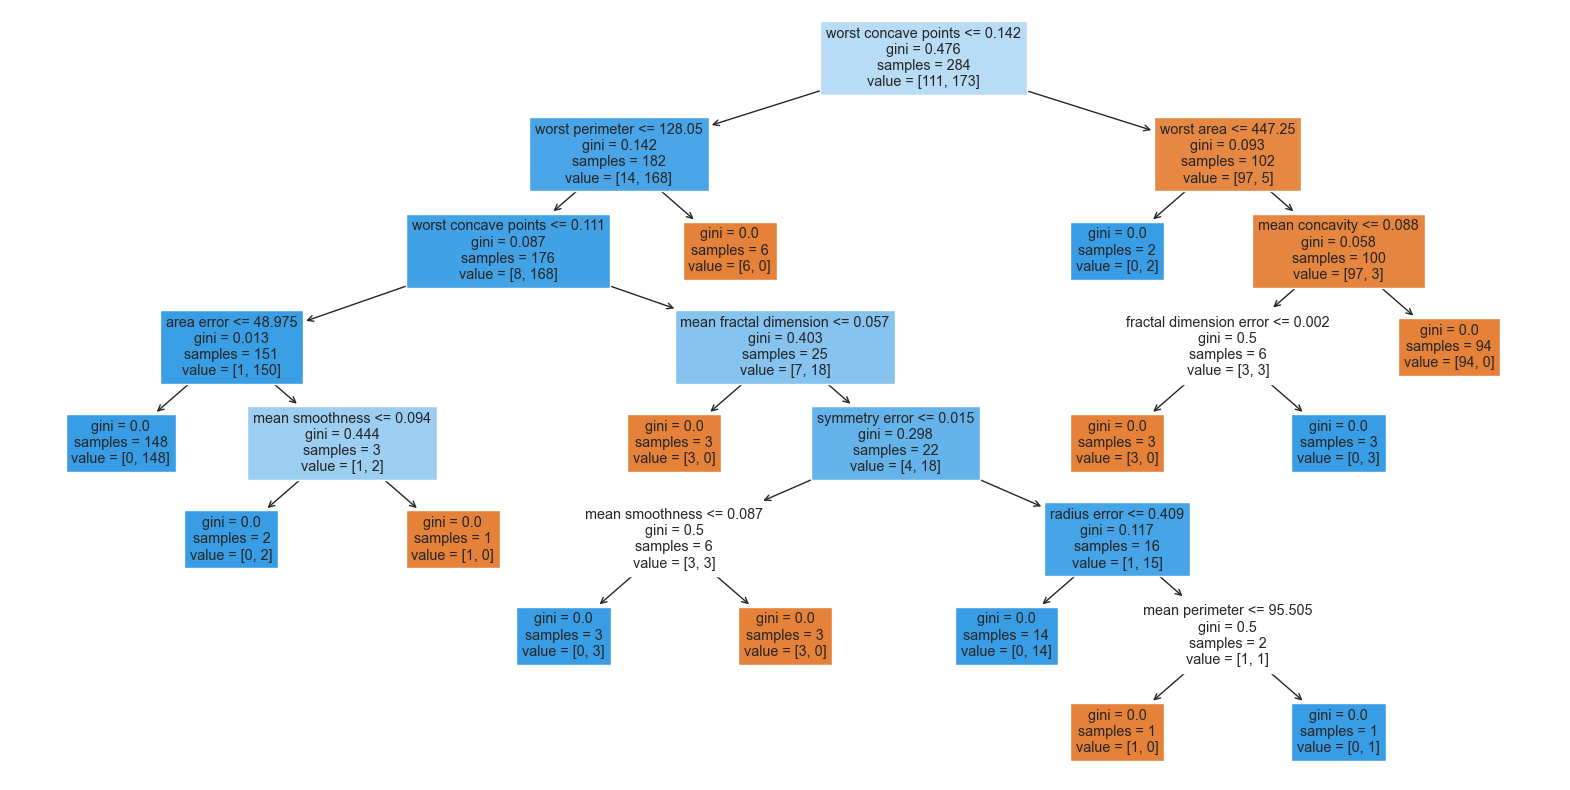

In [18]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True,
        feature_names=dataset.feature_names)
plt.show()

Діаграма відмінності передбачених та наявних діагнозів.

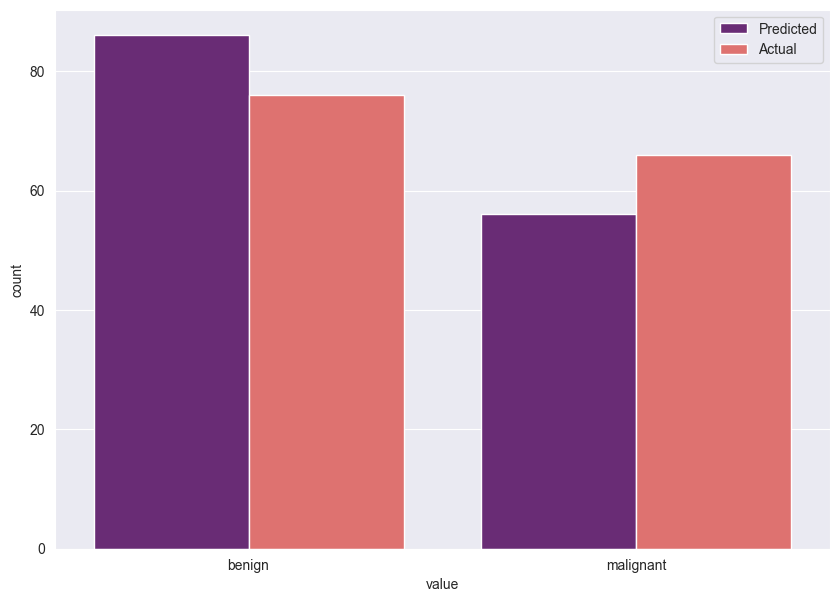

In [19]:
def plot_results(predicted, test):
    plt.figure(figsize=(10, 7))
    df_predict = pd.DataFrame(predicted)
    df_test = pd.DataFrame(test)
    df_plot = pd.DataFrame.merge(df_predict, df_test, left_index=True, right_index=True)\
        .replace({0: dataset.target_names[0]})\
        .replace({1: dataset.target_names[1]})
    df_plot.columns = ["Predicted", "Actual"]
    ax = sns.countplot(data=pd.melt(df_plot), x='value', hue='variable', palette='magma')
    plt.legend()
    plt.show()

plot_results(y_predict, y_test)

Точність передбачення.

In [20]:
clf.score(x_test, y_test)

0.9298245614035088

### Random Forest

Тренування моделі методом Random Forest.

In [21]:
x_train, x_test , y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=9)

rfc=RandomForestClassifier()
rfc = rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)

<module 'matplotlib.pyplot' from 'F:\\Study\\machine_learning\\Lab1\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

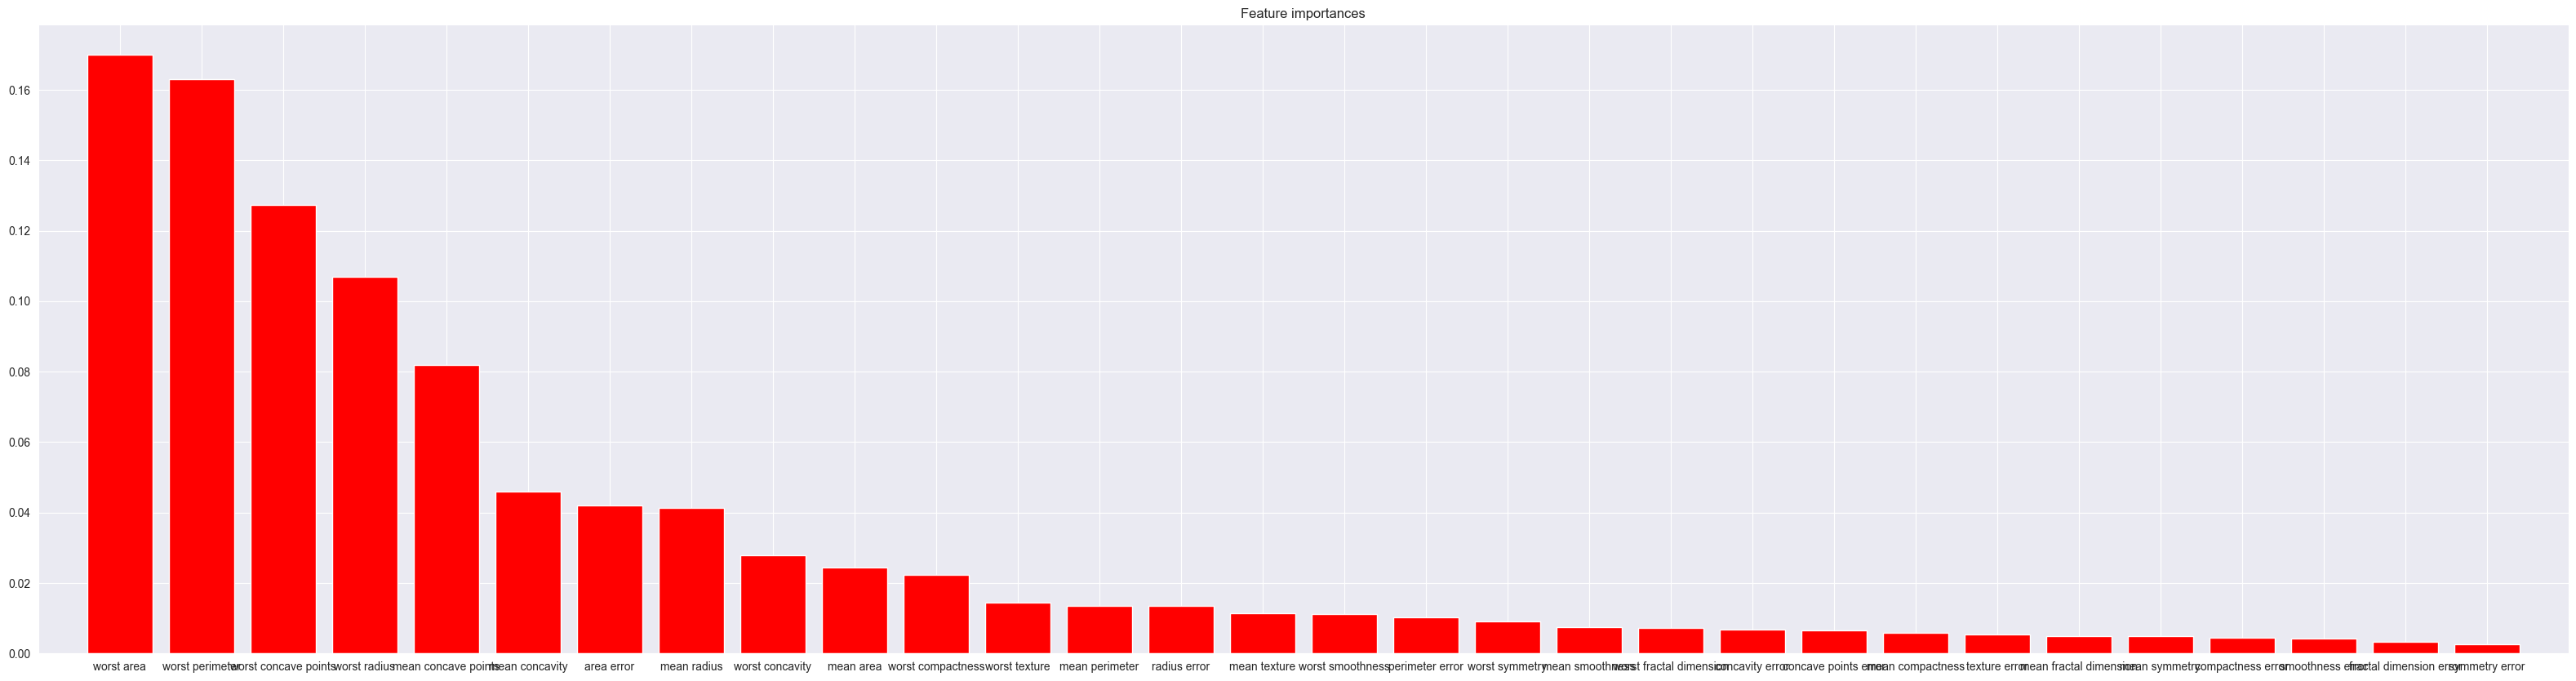

In [22]:
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = dataset.feature_names

plt.figure(figsize=(40,10))
plt.title("Feature importances")
plt.bar(range(dataset.data.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(dataset.data.shape[1]), [feature_names[i] for i in indices])
plt.xlim([-1, dataset.data.shape[1]])
plt

Бачимо, що найважливішими характеристиками для класифікації клітин є найгірший worst radius, worst perimeter, worst area, mean concave points та worst concave points

Діаграма відмінності передбачених та наявних діагнозів.

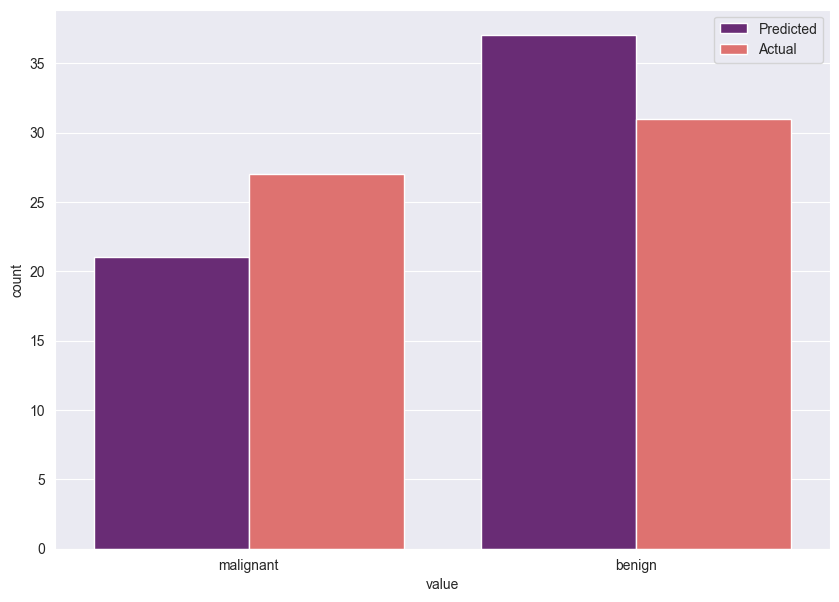

In [23]:
plot_results(y_predict, y_test)

Точність передбачення.

In [24]:
rfc.score(x_test, y_test)

0.9649122807017544